<a href="https://colab.research.google.com/github/alriyadsouza/MediScan-Pro/blob/main/MediScan_Pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Keras-OCR- left to right, top to bottom

In [1]:
!pip install keras-ocr
!pip install matplotlib
!pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 714.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.4 MB/s eta 0:00:00


In [2]:
import math, keras_ocr

In [9]:
image_path = 'Nitrofurantoin.jpg'

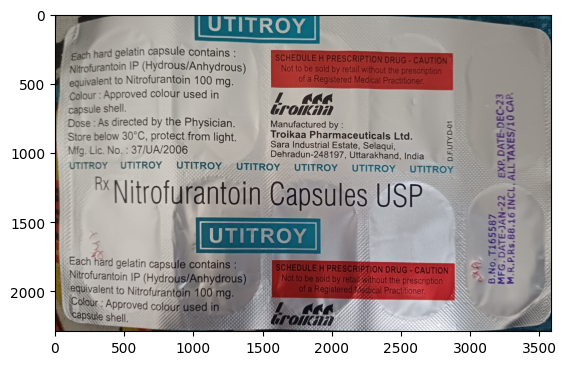

In [10]:
import cv2
import matplotlib.pyplot as plt

# Plot...
original_image = cv2.imread(image_path)
original_image = original_image[:, :, ::-1]
plt.imshow(original_image)

In [11]:
# Initialize pipeline
pipeline = keras_ocr.pipeline.Pipeline()

# Read in image
read_image = keras_ocr.tools.read(image_path)

# prediction_groups is a list of (word, box) tuples
prediction_groups = pipeline.recognize([read_image])

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
5/5 [==============================] - 35s 6s/step


<Axes: >

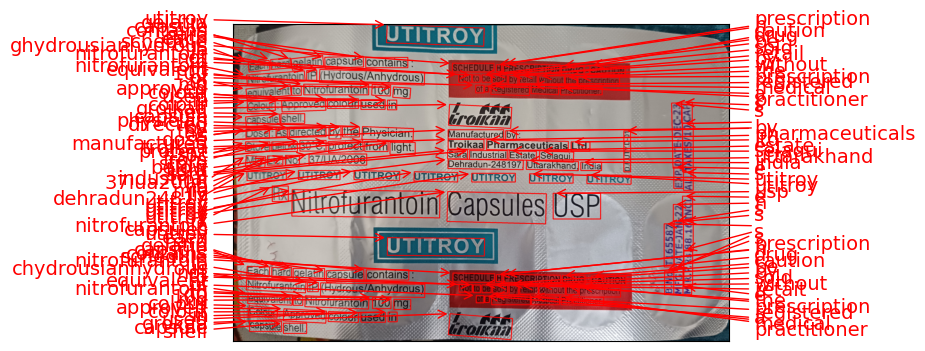

In [12]:
keras_ocr.tools.drawAnnotations(image=read_image, predictions=prediction_groups[0])

In [13]:
# (word, ( [[top-left], [top-right], [bottom-right], [bottom-left]] ))
prediction_groups[0][0]

('utitroy',
 array([[1114.4941   ,    3.9099684],
        [1815.7267   ,   29.10395  ],
        [1811.0101   ,  160.38359  ],
        [1109.7775   ,  135.1896   ]], dtype=float32))

In [14]:
raw_detections = []
for prediction in prediction_groups[0]:
    raw_detections.append(prediction[0])
print(f'Detections: {raw_detections}') # out of order

Detections: ['utitroy', 'capsule', 'gelatin', 'contains', 'hard', 'each', 'schedule', 'h', 'prescription', 'drug', 'caution', 'ghydrousianhydrous', 'ip', 'nitrofurantoin', 'not', 'to', 'be', 'sold', 'retail', 'by', 'without', 'the', 'prescription', 'nitrofurantoin', 'of', 'registered', '100', 'medical', 'a', 'equivalent', 'to', 'practitioner', 'mg', 'approved', 'colour', 'used', 'in', 'colour', 's', 's', 'groikaa', 'shell', 'capsule', '', 'directed', 'by', 'the', 'physician', 'as', 'dose', 'manufactured', '', 'by', 'troikaa', 'pharmaceuticals', '30c', 'protect', 'from', 'store', 'below', 'ltd', 'light', 'sara', 'industrial', 'estate', 'selaqui', '37iua2006', 'no', 'mig', 'lic', 'dehradun24817', 'uttarakhand', 'india', 'e', 'utitroy', 'utitroy', 'utitroy', 'utitroy', 's', 'utitroy', 'utitroy', 'utltroy', 'rx', 'nitrofurantoin', 'capsules', 'usp', 'e', 'n', 's', 's', '', 'utitroy', '', 'each', 'hard', 'gelatin', 's', 'capsule', 'contains', 's', 'schedule', 'h', 'prescription', 'drug', 'c

In [15]:
def get_distance(predictions):
    """
    Function returns dictionary with (key,value):
        * text : detected text in image
        * center_x : center of bounding box (x)
        * center_y : center of bounding box (y)
        * distance_from_origin : hypotenuse
        * distance_y : distance between y and origin (0,0)
    """

    # Point of origin
    x0, y0 = 0, 0

    # Generate dictionary
    detections = []
    for group in predictions:

        # Get center point of bounding box
        top_left_x, top_left_y = group[1][0]
        bottom_right_x, bottom_right_y = group[1][1]
        center_x, center_y = (top_left_x + bottom_right_x)/2, (top_left_y + bottom_right_y)/2

        # Use the Pythagorean Theorem to solve for distance from origin
        distance_from_origin = math.dist([x0,y0], [center_x, center_y])

        # Calculate difference between y and origin to get unique rows
        distance_y = center_y - y0

        # Append all results
        detections.append({
                            'text': group[0],
                            'center_x': center_x,
                            'center_y': center_y,
                            'distance_from_origin': distance_from_origin,
                            'distance_y': distance_y
                        })

    return detections

In [16]:
predictions = prediction_groups[0] # extract text list
predictions = get_distance(predictions)
predictions

[{'text': 'utitroy',
  'center_x': 1465.1103515625,
  'center_y': 16.506959915161133,
  'distance_from_origin': 1465.2033381006313,
  'distance_y': 16.506959915161133},
 {'text': 'capsule',
  'center_x': 802.199951171875,
  'center_y': 236.6000213623047,
  'distance_from_origin': 836.3637556522889,
  'distance_y': 236.6000213623047},
 {'text': 'gelatin',
  'center_x': 533.6961669921875,
  'center_y': 238.4180908203125,
  'distance_from_origin': 584.5295413343587,
  'distance_y': 238.4180908203125},
 {'text': 'contains',
  'center_x': 1111.25,
  'center_y': 241.5,
  'distance_from_origin': 1137.1889959457046,
  'distance_y': 241.5},
 {'text': 'hard',
  'center_x': 343.8350524902344,
  'center_y': 251.44033813476562,
  'distance_from_origin': 425.9633634038114,
  'distance_y': 251.44033813476562},
 {'text': 'each',
  'center_x': 185.22280883789062,
  'center_y': 270.22772216796875,
  'distance_from_origin': 327.6133555609214,
  'distance_y': 270.22772216796875},
 {'text': 'schedule',
  '

In [17]:
def distinguish_rows(lst, thresh=15):
    """Function to help distinguish unique rows"""
    sublists = []
    for i in range(0, len(lst)-1):
        if (lst[i+1]['distance_y'] - lst[i]['distance_y'] <= thresh):
            if lst[i] not in sublists:
                sublists.append(lst[i])
            sublists.append(lst[i+1])
        else:
            yield sublists
            sublists = [lst[i+1]]
    yield sublists

In [18]:
# Set thresh higher for text further apart
predictions = list(distinguish_rows(predictions, thresh=15))
predictions

[[],
 [{'text': 'capsule',
   'center_x': 802.199951171875,
   'center_y': 236.6000213623047,
   'distance_from_origin': 836.3637556522889,
   'distance_y': 236.6000213623047},
  {'text': 'gelatin',
   'center_x': 533.6961669921875,
   'center_y': 238.4180908203125,
   'distance_from_origin': 584.5295413343587,
   'distance_y': 238.4180908203125},
  {'text': 'contains',
   'center_x': 1111.25,
   'center_y': 241.5,
   'distance_from_origin': 1137.1889959457046,
   'distance_y': 241.5},
  {'text': 'hard',
   'center_x': 343.8350524902344,
   'center_y': 251.44033813476562,
   'distance_from_origin': 425.9633634038114,
   'distance_y': 251.44033813476562}],
 [{'text': 'each',
   'center_x': 185.22280883789062,
   'center_y': 270.22772216796875,
   'distance_from_origin': 327.6133555609214,
   'distance_y': 270.22772216796875},
  {'text': 'schedule',
   'center_x': 1736.0,
   'center_y': 283.4999694824219,
   'distance_from_origin': 1758.9963708593984,
   'distance_y': 283.4999694824219},

In [19]:
predictions = list(filter(lambda x:x!=[], predictions))

In [20]:
# Order text detections in human readable format
ordered_preds = []
for row in predictions:
    row = sorted(row, key=lambda x:x['distance_from_origin'])
    for each in row: ordered_preds.append(each['text'])
print(f'Detections: {ordered_preds}')

Detections: ['hard', 'gelatin', 'capsule', 'contains', 'each', 'schedule', 'h', 'prescription', 'drug', 'caution', 'ip', 'ghydrousianhydrous', 'nitrofurantoin', 'not', 'to', 'be', 'sold', 'by', 'retail', 'without', 'the', 'prescription', 'equivalent', 'to', 'nitrofurantoin', '100', 'mg', 'of', 'a', 'registered', 'medical', 'practitioner', 'colour', 'approved', 'colour', 'used', 'in', 's', 's', 'groikaa', 'capsule', 'shell', '', 'dose', 'as', 'directed', 'by', 'the', 'physician', 'manufactured', 'by', '', 'store', 'below', '30c', 'protect', 'from', 'light', 'troikaa', 'pharmaceuticals', 'ltd', 'sara', 'industrial', 'estate', 'selaqui', 'mig', 'lic', 'no', '37iua2006', 'dehradun24817', 'uttarakhand', 'india', 'e', 'utitroy', 'utitroy', 'utitroy', 'utitroy', 'utitroy', 'utitroy', 'utltroy', 's', 'rx', 'nitrofurantoin', 'capsules', 'usp', 'e', 'n', 's', 's', '', 'utitroy', '', 'each', 'hard', 'gelatin', 'capsule', 'contains', 'schedule', 'h', 'prescription', 'drug', 'caution', 's', 's', 'n

In [21]:
# Join detections into sentence
' '.join(ordered_preds)

'hard gelatin capsule contains each schedule h prescription drug caution ip ghydrousianhydrous nitrofurantoin not to be sold by retail without the prescription equivalent to nitrofurantoin 100 mg of a registered medical practitioner colour approved colour used in s s groikaa capsule shell  dose as directed by the physician manufactured by  store below 30c protect from light troikaa pharmaceuticals ltd sara industrial estate selaqui mig lic no 37iua2006 dehradun24817 uttarakhand india e utitroy utitroy utitroy utitroy utitroy utitroy utltroy s rx nitrofurantoin capsules usp e n s s  utitroy  each hard gelatin capsule contains schedule h prescription drug caution s s nitrofurantoin ip chydrousianhydrous not to be sold by retait without the prescription e equivalent to nitrofurantoin 100 mg of a registered medical practitioner colour approved colour used in grokaa capsule shell'